In [5]:
from IPython.display import display
from IPython.display import HTML
import IPython.core.display as di # Example: di.display_html('<h3>%s:</h3>' % str, raw=True)

# This line will hide code by default when the notebook is exported as HTML
di.display_html('<script>jQuery(function() {if (jQuery("body.notebook_app").length == 0) { jQuery(".input_area").toggle(); jQuery(".prompt").toggle();}});</script>', raw=True)

# This line will add a button to toggle visibility of code blocks, for use with the HTML export version
di.display_html('''<button onclick="jQuery('.input_area').toggle(); jQuery('.prompt').toggle();">Toggle code</button>''', raw=True)


Toggle code

In [6]:
# all modules necessary for this nb
import os
import sys
import pickle
import math

import numpy as np
import pylab as pl
import scipy.stats as sstats

# setting parameters for default matplotlib plots
%matplotlib inline

In [7]:
pl.style.use('fabiostyle')
pl.rcParams['pdf.fonttype']=42
pl.rcParams['ps.fonttype']=42
# needs to find the library of functions
sys.path.append('../../../code/')  # to be replaced!

import utils as ut
import plots as pt

In [8]:
#%%javascript
#var nb = IPython.notebook;
#var kernel = IPython.notebook.kernel;
#var command = "NOTEBOOK_NAME = '" + nb.base_url + nb.notebook_path + "'";
#kernel.execute(command);

In [9]:
NOTEBOOK_NAME = 'heatmaps_vhpc_JSB'

In [10]:
from pickleshare import PickleShareDB

autorestore_folder = os.path.join(os.getcwd(), 'autorestore', NOTEBOOK_NAME)
db = PickleShareDB(autorestore_folder)
import sys
from workspace import *
import IPython
ip = IPython.get_ipython()

# this will restore all the saved variables. ignore the errors listed.
load_workspace(ip, db)

# use `save_worspace(db)` to save variables at the end

In [7]:
all_animals =     'c3f3', 'c3f2', 'c3m1', 'c3m2', 'c4m4', 'c10m8', '90', '91', '92', '93'
pre_animals =     'c3f3', 'c3f2', 'c3m1', 'c3m2', 'c4m4', 'c10m8', '90', '91', '92', '93'
post_animals =    'c3f3', 'c3f2', 'c3m1', 'c3m2', 'c4m4', 'c10m8', '90', '91', '92', '93','91b','92b','93b'
pre_rev_animals = 'c3f3', 'c3f2', 'c3m1', 'c3m2', 'c4m4', 'c10m8', '90', '91', '92', '93'
post_rev_animals ='c3f3', 'c3f2', 'c3m1', 'c3m2', 'c4m4', 'c10m8', '90', '91', '92', '93','91b','92b','93b'
catch_animals =   'c3f3', 'c3f2', 'c3m1', 'c3m2', 'c4m4', 'c10m8', '90', '91', '92', '93'

In [8]:
#find animals common to both sessions
preVSpost_animals =       'c3f3', 'c3f2', 'c3m1', 'c3m2', 'c4m4', 'c10m8', '90', '91', '92', '93'
preVSpre_rev_animals =    'c3f3', 'c3f2', 'c3m1', 'c3m2', 'c4m4', 'c10m8', '90', '91', '92', '93'
preVSpost_rev_animals =   'c3f3',         'c3m1', 'c3m2', 'c4m4', 'c10m8', '90', '91',       '93'
postVSpost_rev_animals =  'c3f3', 'c3f2', 'c3m1', 'c3m2', 'c4m4', 'c10m8', '90', '91', '92', '93','91b','92b','93b'
postVSpre_rev_animals =   'c3f3', 'c3f2', 'c3m1', 'c3m2', 'c4m4', 'c10m8', '90', '91', '92', '93'
pre_revVSpost_rev_animals='c3f3', 'c3f2', 'c3m1', 'c3m2', 'c4m4', 'c10m8', '90', '91', '92', '93'
postVScatch_animals =     'c3f3', 'c3f2', 'c3m1', 'c3m2', 'c4m4', 'c10m8', '90', '91', '92', '93'
post_revVScatch_animals=  'c3f3', 'c3f2', 'c3m1', 'c3m2', 'c4m4', 'c10m8', '90', '91', '92',

In [9]:
sessions = 'pre','post','pre_rev','post_rev','catch'

In [10]:
for sess in sessions:
    exec("%s_anivars = {}"%sess)
    for animal in eval("%s_animals"%sess):
        
        exec("vars_%s = {}"%sess)
        folder = '../%s/3odor_%s/notebooks/autorestore/preprocessing/' % (animal,sess)
        for var in ('time_ax', 'time_ax_single', 'events', 'cycles', 'is_CSmt', 'is_rewardt', 'is_sht',
                    'traces', 'CYCLE_START', 'CS_DURATION'): 
            eval("vars_%s"%sess).update({var:ut.load_variable(var, folder=folder)})
            
        eval("%s_anivars"%sess).update({animal:{}})
        eval("%s_anivars[animal]"%(sess)).update({eval("'vars_%s'"%sess):eval("vars_%s"%sess)})

    
    #    cellregs = dict(zip(conditions, [ut.load_cellreg_dict('../%s/data/cellreg_dict.txt' % animal, c) for c in conditions]))
    #    anivars[animal].update({'cellregs':cellregs})

In [11]:
pre_anivars.keys()

['c10m8', '92', 'c3f2', '91', '90', '93', 'c3f3', 'c3m1', 'c4m4', 'c3m2']

In [12]:
zscored = True

for sess in sessions:
    exec("all_hms_%s_CSm_evs=[]"%sess)
    exec("all_hms_%s_Rew_evs=[]"%sess)
    exec("all_hms_%s_Sh_evs=[]"%sess)
    for animal in eval("%s_animals"%sess):
    #    cellregs = anivars[animal]['cellregs']
        exec("vars_%s = %s_anivars['%s']['vars_%s']"%(sess,sess,animal,sess))
    
        for k in eval("vars_%s.keys()"%sess):
            exec('%s = vars_%s[\'%s\']' % (k,sess,k))
    
        exec("hm_%s_CSm_evs = np.r_[[ut.compute_all_dffs(time_ax, events, cell, cycles[is_CSmt], time_ax_single)\
                        for cell in range(len(vars_%s['events'][0]))]]"%(sess,sess))
        exec("hm_%s_CSm_evs = np.r_[[np.mean(h, 0)/np.std(h, 0) if zscored else np.mean(h, 0)/np.max(h.mean(0)) for h in hm_%s_CSm_evs]]"%(sess,sess))
        exec("hm_%s_Rew_evs = np.r_[[ut.compute_all_dffs(time_ax, events, cell, cycles[is_rewardt], time_ax_single)\
                        for cell in range(len(vars_%s['events'][0]))]]"%(sess,sess))
        exec("hm_%s_Rew_evs = np.r_[[np.mean(h, 0)/np.std(h, 0) if zscored else np.mean(h, 0)/np.max(h.mean(0)) for h in hm_%s_Rew_evs]]"%(sess,sess))
        exec("hm_%s_Sh_evs = np.r_[[ut.compute_all_dffs(time_ax, events, cell, cycles[is_sht], time_ax_single)\
                        for cell in range(len(vars_%s['events'][0]))]]"%(sess,sess))
        exec("hm_%s_Sh_evs = np.r_[[np.mean(h, 0)/np.std(h, 0) if zscored else np.mean(h, 0)/np.max(h.mean(0)) for h in hm_%s_Sh_evs]]"%(sess,sess))
    
        
        eval("all_hms_%s_CSm_evs.append(hm_%s_CSm_evs)"%(sess, sess))
        eval("all_hms_%s_Rew_evs.append(hm_%s_Rew_evs)"%(sess, sess))
        eval("all_hms_%s_Sh_evs.append(hm_%s_Sh_evs)"%(sess, sess))

/home/fabios/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in divide
  if __name__ == '__main__':


In [13]:
zscored = True

for sess in sessions:
    exec("all_hms_%s_CSm_traces=[]"%sess)
    exec("all_hms_%s_Rew_traces=[]"%sess)
    exec("all_hms_%s_Sh_traces=[]"%sess)
    for animal in eval("%s_animals"%sess):
    #    cellregs = anivars[animal]['cellregs']
        exec("vars_%s = %s_anivars['%s']['vars_%s']"%(sess,sess,animal,sess))
    
        for k in eval("vars_%s.keys()"%sess):
            exec('%s = vars_%s[\'%s\']' % (k,sess,k))
    
        exec("hm_%s_CSm_traces = np.r_[[ut.compute_all_dffs(time_ax, traces, cell, cycles[is_CSmt], time_ax_single)\
                        for cell in range(len(vars_%s['traces'][0]))]]"%(sess,sess))
        exec("hm_%s_CSm_traces = np.r_[[np.mean(h, 0)/np.std(h, 0) if zscored else np.mean(h, 0)/np.max(h.mean(0)) for h in hm_%s_CSm_traces]]"%(sess,sess))
        exec("hm_%s_Rew_traces = np.r_[[ut.compute_all_dffs(time_ax, traces, cell, cycles[is_rewardt], time_ax_single)\
                        for cell in range(len(vars_%s['traces'][0]))]]"%(sess,sess))
        exec("hm_%s_Rew_traces = np.r_[[np.mean(h, 0)/np.std(h, 0) if zscored else np.mean(h, 0)/np.max(h.mean(0)) for h in hm_%s_Rew_traces]]"%(sess,sess))
        exec("hm_%s_Sh_traces = np.r_[[ut.compute_all_dffs(time_ax, traces, cell, cycles[is_sht], time_ax_single)\
                        for cell in range(len(vars_%s['traces'][0]))]]"%(sess,sess))
        exec("hm_%s_Sh_traces = np.r_[[np.mean(h, 0)/np.std(h, 0) if zscored else np.mean(h, 0)/np.max(h.mean(0)) for h in hm_%s_Sh_traces]]"%(sess,sess))
    
        
        eval("all_hms_%s_CSm_traces.append(hm_%s_CSm_traces)"%(sess, sess))
        eval("all_hms_%s_Rew_traces.append(hm_%s_Rew_traces)"%(sess, sess))
        eval("all_hms_%s_Sh_traces.append(hm_%s_Sh_traces)"%(sess, sess))

In [14]:
for sess in sessions:
    for trialtype in ('CSm','Rew','Sh'):
        exec("max_t = np.min([a.shape[1] for a in all_hms_%s_%s_evs])"%(sess,trialtype))
        exec("all_hms_%s_%s_evs = np.row_stack([a[:, :max_t] for a in all_hms_%s_%s_evs])"%(sess,trialtype,sess,trialtype))
        exec("all_hms_%s_%s_traces = np.row_stack([a[:, :max_t] for a in all_hms_%s_%s_traces])"%(sess,trialtype,sess,trialtype))
        exec("min_time_ax_single_%s = vars_%s['time_ax_single'][:max_t]"%(sess,sess))
    print max_t

48
48
48
48
48


In [15]:
#convert nan to 0
for sess in sessions:
    for tt in ('CSm','Rew','Sh'):
        exec("all_hms_%s_%s_evs[np.isnan(all_hms_%s_%s_evs)]=0"%(sess,tt,sess,tt))
        exec("all_hms_%s_%s_traces[np.isnan(all_hms_%s_%s_traces)]=0"%(sess,tt,sess,tt))

In [16]:
for sess in sessions:
    for trialtype in ('CSm','Rew','Sh'):
        exec("sort_%s_%s_evs = np.argsort([np.argmax(h) for h in all_hms_%s_%s_evs])"%(sess,trialtype,sess,trialtype))
        exec("minsort_%s_%s_evs = np.argsort([np.argmin(h) for h in all_hms_%s_%s_evs])"%(sess,trialtype,sess,trialtype))
        exec("sort_%s_%s_traces = np.argsort([np.argmax(h) for h in all_hms_%s_%s_traces])"%(sess,trialtype,sess,trialtype))
        exec("minsort_%s_%s_traces = np.argsort([np.argmin(h) for h in all_hms_%s_%s_traces])"%(sess,trialtype,sess,trialtype))

In [17]:
for sess in sessions:
    print sess
    for ani in eval("%s_animals"%sess):
        print ani,":",
        print len(eval("%s_anivars[ani]['vars_%s']['time_ax_single']"%(sess,sess))),
    print len(eval("min_time_ax_single_%s"%sess))
    print len(eval("all_hms_%s_CSm_evs[0]"%sess))
    

pre
c3f3 : 49 c3f2 : 49 c3m1 : 49 c3m2 : 49 c4m4 : 49 c10m8 : 49 90 : 48 91 : 48 92 : 48 93 : 49 48
48
post
c3f3 : 49 c3f2 : 49 c3m1 : 49 c3m2 : 49 c4m4 : 49 c10m8 : 49 90 : 48 91 : 48 92 : 48 93 : 49 91b : 48 92b : 48 93b : 49 48
48
pre_rev
c3f3 : 49 c3f2 : 49 c3m1 : 49 c3m2 : 49 c4m4 : 49 c10m8 : 49 90 : 48 91 : 48 92 : 48 93 : 49 48
48
post_rev
c3f3 : 49 c3f2 : 49 c3m1 : 49 c3m2 : 49 c4m4 : 49 c10m8 : 49 90 : 48 91 : 48 92 : 48 93 : 48 91b : 48 92b : 48 93b : 49 48
48
catch
c3f3 : 49 c3f2 : 49 c3m1 : 49 c3m2 : 49 c4m4 : 49 c10m8 : 49 90 : 48 91 : 48 92 : 48 93 : 49 48
48


In [18]:
for x in range(len(all_hms_catch_CSm_evs)):
    print x,(all_hms_catch_CSm_evs[x])

0 [ 0.22941573  0.22941573  0.22941573  0.31781342  0.          0.
  0.22941573  0.22941573  0.22941573  0.22941573  0.22941573  0.22941573
  0.          0.          0.          0.          0.          0.          0.
  0.22941573  0.22941573  0.22941573  0.30240221  0.32318668  0.31691238
  0.33326092  0.33120668  0.22941573  0.22941573  0.22941573  0.22941573
  0.22941573  0.22941573  0.22941573  0.22941573  0.22941573  0.22941573
  0.22941573  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.        ]
1 [ 0.22941573  0.          0.          0.22941573  0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.22941573  0.          0.          0.          0.          0.
  0.          0.          0.22941573  0.22941573  0.22941573  0.22941573
  0.22941573  0.22941573  0.22941573  0.22941573  0.          0.          0.
  0.22941573  0.          0.          0.          0.  

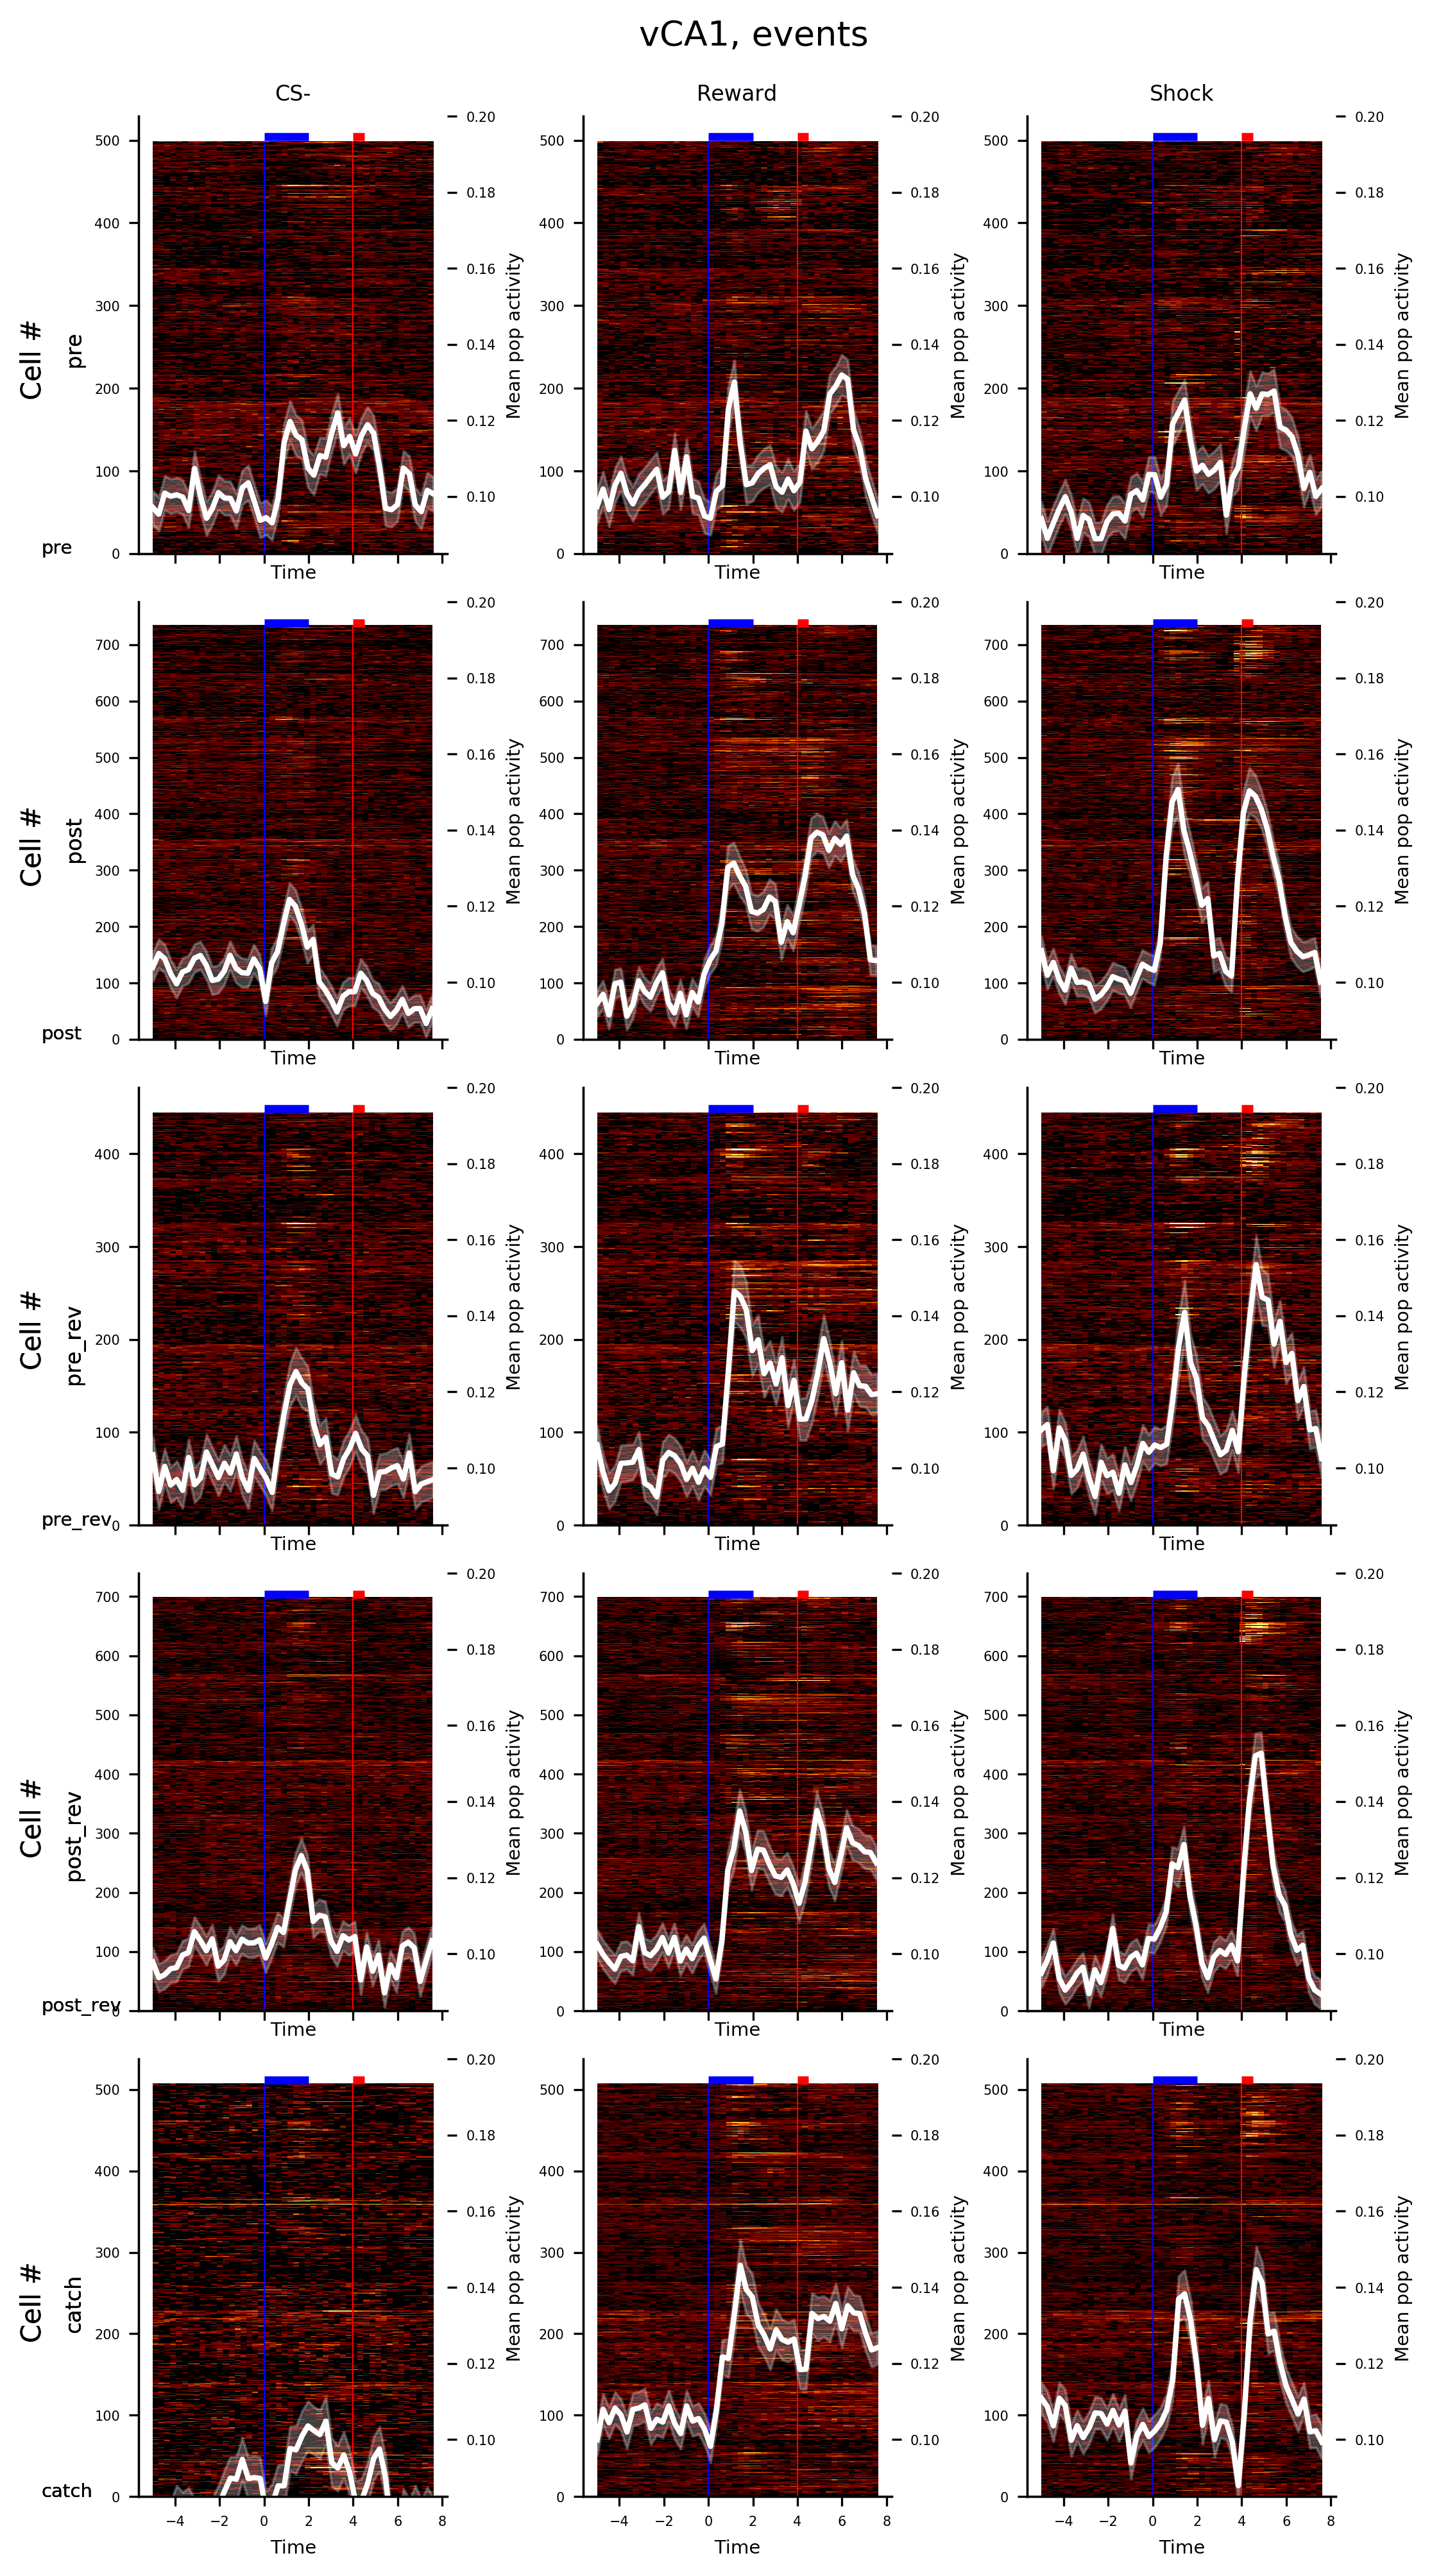

In [19]:
fig, axs = pl.subplots(len(sessions), 3, figsize=(7, np.ceil(all_hms_pre_CSm_evs.shape[0]/40.)), sharex=True)
for sess,i in zip(sessions,range(len(sessions))):
    for tt,z in zip(['CSm','Rew','Sh'],range(3)):
        func = lambda x, y: x.imshow(y, aspect='auto', extent=(eval("min_time_ax_single_%s[0]"%sess), eval("min_time_ax_single_%s[-1]"%sess), 0, 
                                 len(eval("all_hms_%s_%s_evs"%(sess,tt)))),vmin=0, vmax=1, cmap='afmhot')

        func(axs[i][z], eval("all_hms_%s_%s_evs"%(sess,tt)))
        axs[i][0].text(-10,0, sess, fontsize=7)
        axs[i][z].set_xlabel("Time")
        axs[i][z].vlines([0, 4], 0, len(eval("all_hms_%s_CSm_evs"%sess)), color=['b','r'], lw=.5)
        axs[i][z].hlines(len(eval("all_hms_%s_CSm_evs"%sess))+5, 0, 2, color='b', lw=3)
        axs[i][z].hlines(len(eval("all_hms_%s_CSm_evs"%sess))+5, 4, 4.5, color='r', lw=3)
        axs[i][0].text(-9,len(eval("all_hms_%s_CSm_evs"%sess))/2, sess, fontsize=8, rotation=90)
        axs[i][0].text(-11,len(eval("all_hms_%s_CSm_evs"%sess))/2+10, "Cell #", fontsize=10, rotation=90)
        twin_ax = axs[i][z].twinx()
        twin_ax.set_ylabel("Mean pop activity")
        twin_ax.plot(eval("min_time_ax_single_%s"%sess),eval("all_hms_%s_%s_evs.mean(0)"%(sess,tt)),color='w',lw=2)
        m = eval("all_hms_%s_%s_evs.mean(0)"%(sess,tt))
        sem = eval("all_hms_%s_%s_evs.std(0)/(math.sqrt(len(all_hms_%s_%s_evs)))"%(sess,tt,sess,tt))
        twin_ax.fill_between(eval("min_time_ax_single_%s"%sess),m-sem,m+sem,alpha=0.25,color='w',linewidth=1)
        twin_ax.set_ylim(0.085,.2)

# axs[0][0].imshow(all_hms_pre1[sort_pre1], aspect='auto', extent=(time_ax_single[0], time_ax_single[-1], 0, len(sort_pre1)),
#                  vmin=0, vmax=1)
#for ax in axs.flatten():
#    #pt.remove_axes(ax)
#    ax.tick_params(
#    axis='x',          # changes apply to the x-axis
#    which='both',      # both major and minor ticks are affected
#    bottom=False,      # ticks along the bottom edge are off
#    top=False,         # ticks along the top edge are off
#    labelbottom=False) # labels along the bottom edge are off
    #ax.vlines([0, 4], 0, len(sort_pre_CSm), color='b', lw=.5)

axs[0][0].set_title('CS-', fontsize=8)
axs[0][1].set_title('Reward', fontsize=8)
axs[0][2].set_title('Shock', fontsize=8)

fig.suptitle("vCA1, events", fontsize=13, y=1.02)
fig.tight_layout()
fig.savefig('../img/%s_event_heatmaps.jpg'%(NOTEBOOK_NAME))

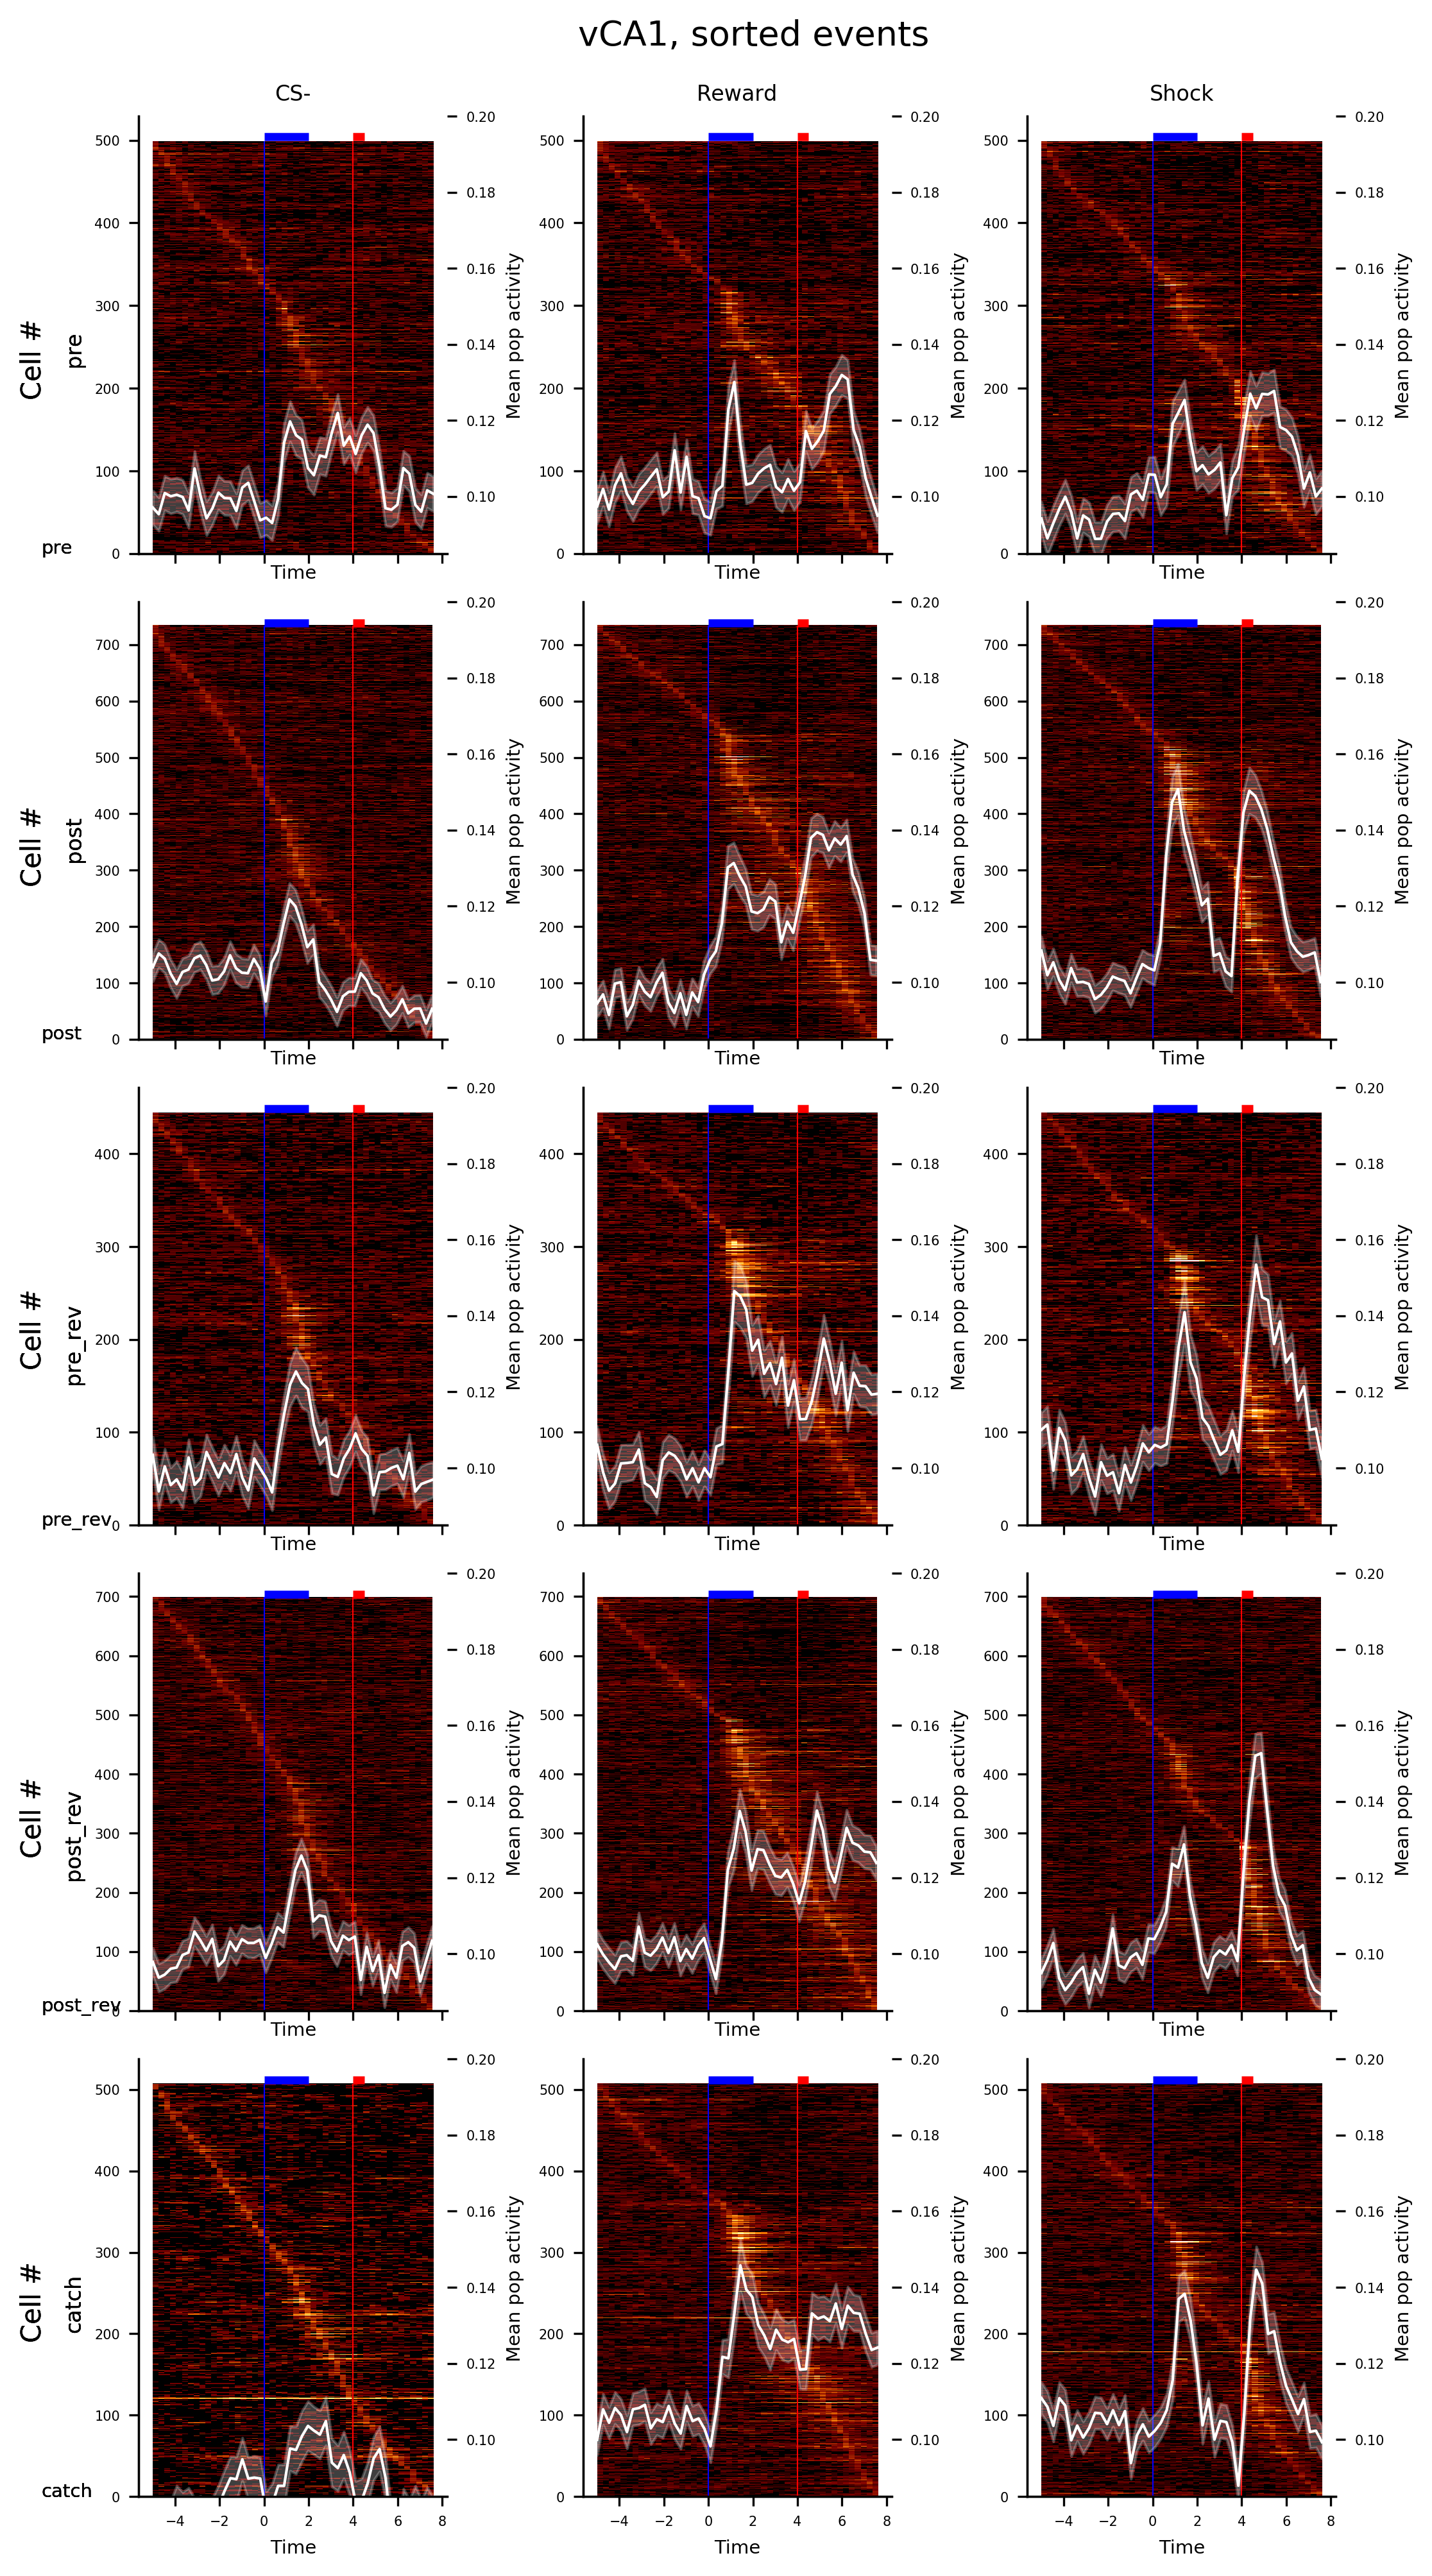

In [11]:
fig, axs = pl.subplots(len(sessions), 3, figsize=(7, np.ceil(all_hms_pre_CSm_evs.shape[0]/40.)), sharex=True)
for sess,i in zip(sessions,range(len(sessions))):
    for tt,z in zip(['CSm','Rew','Sh'],range(3)):
        func = lambda x, y: x.imshow(y, aspect='auto', extent=(eval("min_time_ax_single_%s[0]"%sess), eval("min_time_ax_single_%s[-1]"%sess), 0, 
                                 len(eval("all_hms_%s_%s_evs"%(sess,tt)))),vmin=0, vmax=1, cmap='afmhot')

        func(axs[i][z], eval("all_hms_%s_%s_evs[sort_%s_%s_evs]"%(sess,tt,sess,tt)))
        axs[i][0].text(-10,0, sess, fontsize=7)
        axs[i][z].set_xlabel("Time")
        axs[i][z].vlines([0, 4], 0, len(eval("all_hms_%s_CSm_evs"%sess)), color=['b','r'], lw=.5)
        axs[i][z].hlines(len(eval("all_hms_%s_CSm_evs"%sess))+5, 0, 2, color='b', lw=3)
        axs[i][z].hlines(len(eval("all_hms_%s_CSm_evs"%sess))+5, 4, 4.5, color='r', lw=3)
        axs[i][0].text(-9,len(eval("all_hms_%s_CSm_evs"%sess))/2, sess, fontsize=8, rotation=90)
        axs[i][0].text(-11,len(eval("all_hms_%s_CSm_evs"%sess))/2+10, "Cell #", fontsize=10, rotation=90)
        twin_ax = axs[i][z].twinx()
        twin_ax.set_ylabel("Mean pop activity")
        twin_ax.plot(eval("min_time_ax_single_%s"%sess),eval("all_hms_%s_%s_evs.mean(0)"%(sess,tt)),color='w',lw=1)
        m = eval("all_hms_%s_%s_evs.mean(0)"%(sess,tt))
        sem = eval("all_hms_%s_%s_evs.std(0)/(math.sqrt(len(all_hms_%s_%s_evs)))"%(sess,tt,sess,tt))
        twin_ax.fill_between(eval("min_time_ax_single_%s"%sess),m-sem,m+sem,alpha=0.25,color='w',linewidth=1)
        twin_ax.set_ylim(0.085,.2)

# axs[0][0].imshow(all_hms_pre1[sort_pre1], aspect='auto', extent=(time_ax_single[0], time_ax_single[-1], 0, len(sort_pre1)),
#                  vmin=0, vmax=1)
#for ax in axs.flatten():
#    #pt.remove_axes(ax)
#    ax.tick_params(
#    axis='x',          # changes apply to the x-axis
#    which='both',      # both major and minor ticks are affected
#    bottom=False,      # ticks along the bottom edge are off
#    top=False,         # ticks along the top edge are off
#    labelbottom=False) # labels along the bottom edge are off
    #ax.vlines([0, 4], 0, len(sort_pre_CSm), color='b', lw=.5)

axs[0][0].set_title('CS-', fontsize=8)
axs[0][1].set_title('Reward', fontsize=8)
axs[0][2].set_title('Shock', fontsize=8)

fig.suptitle("vCA1, sorted events", fontsize=13, y=1.02)
fig.tight_layout()
fig.savefig('../figures/%s_sorted_event.pdf'%(NOTEBOOK_NAME))

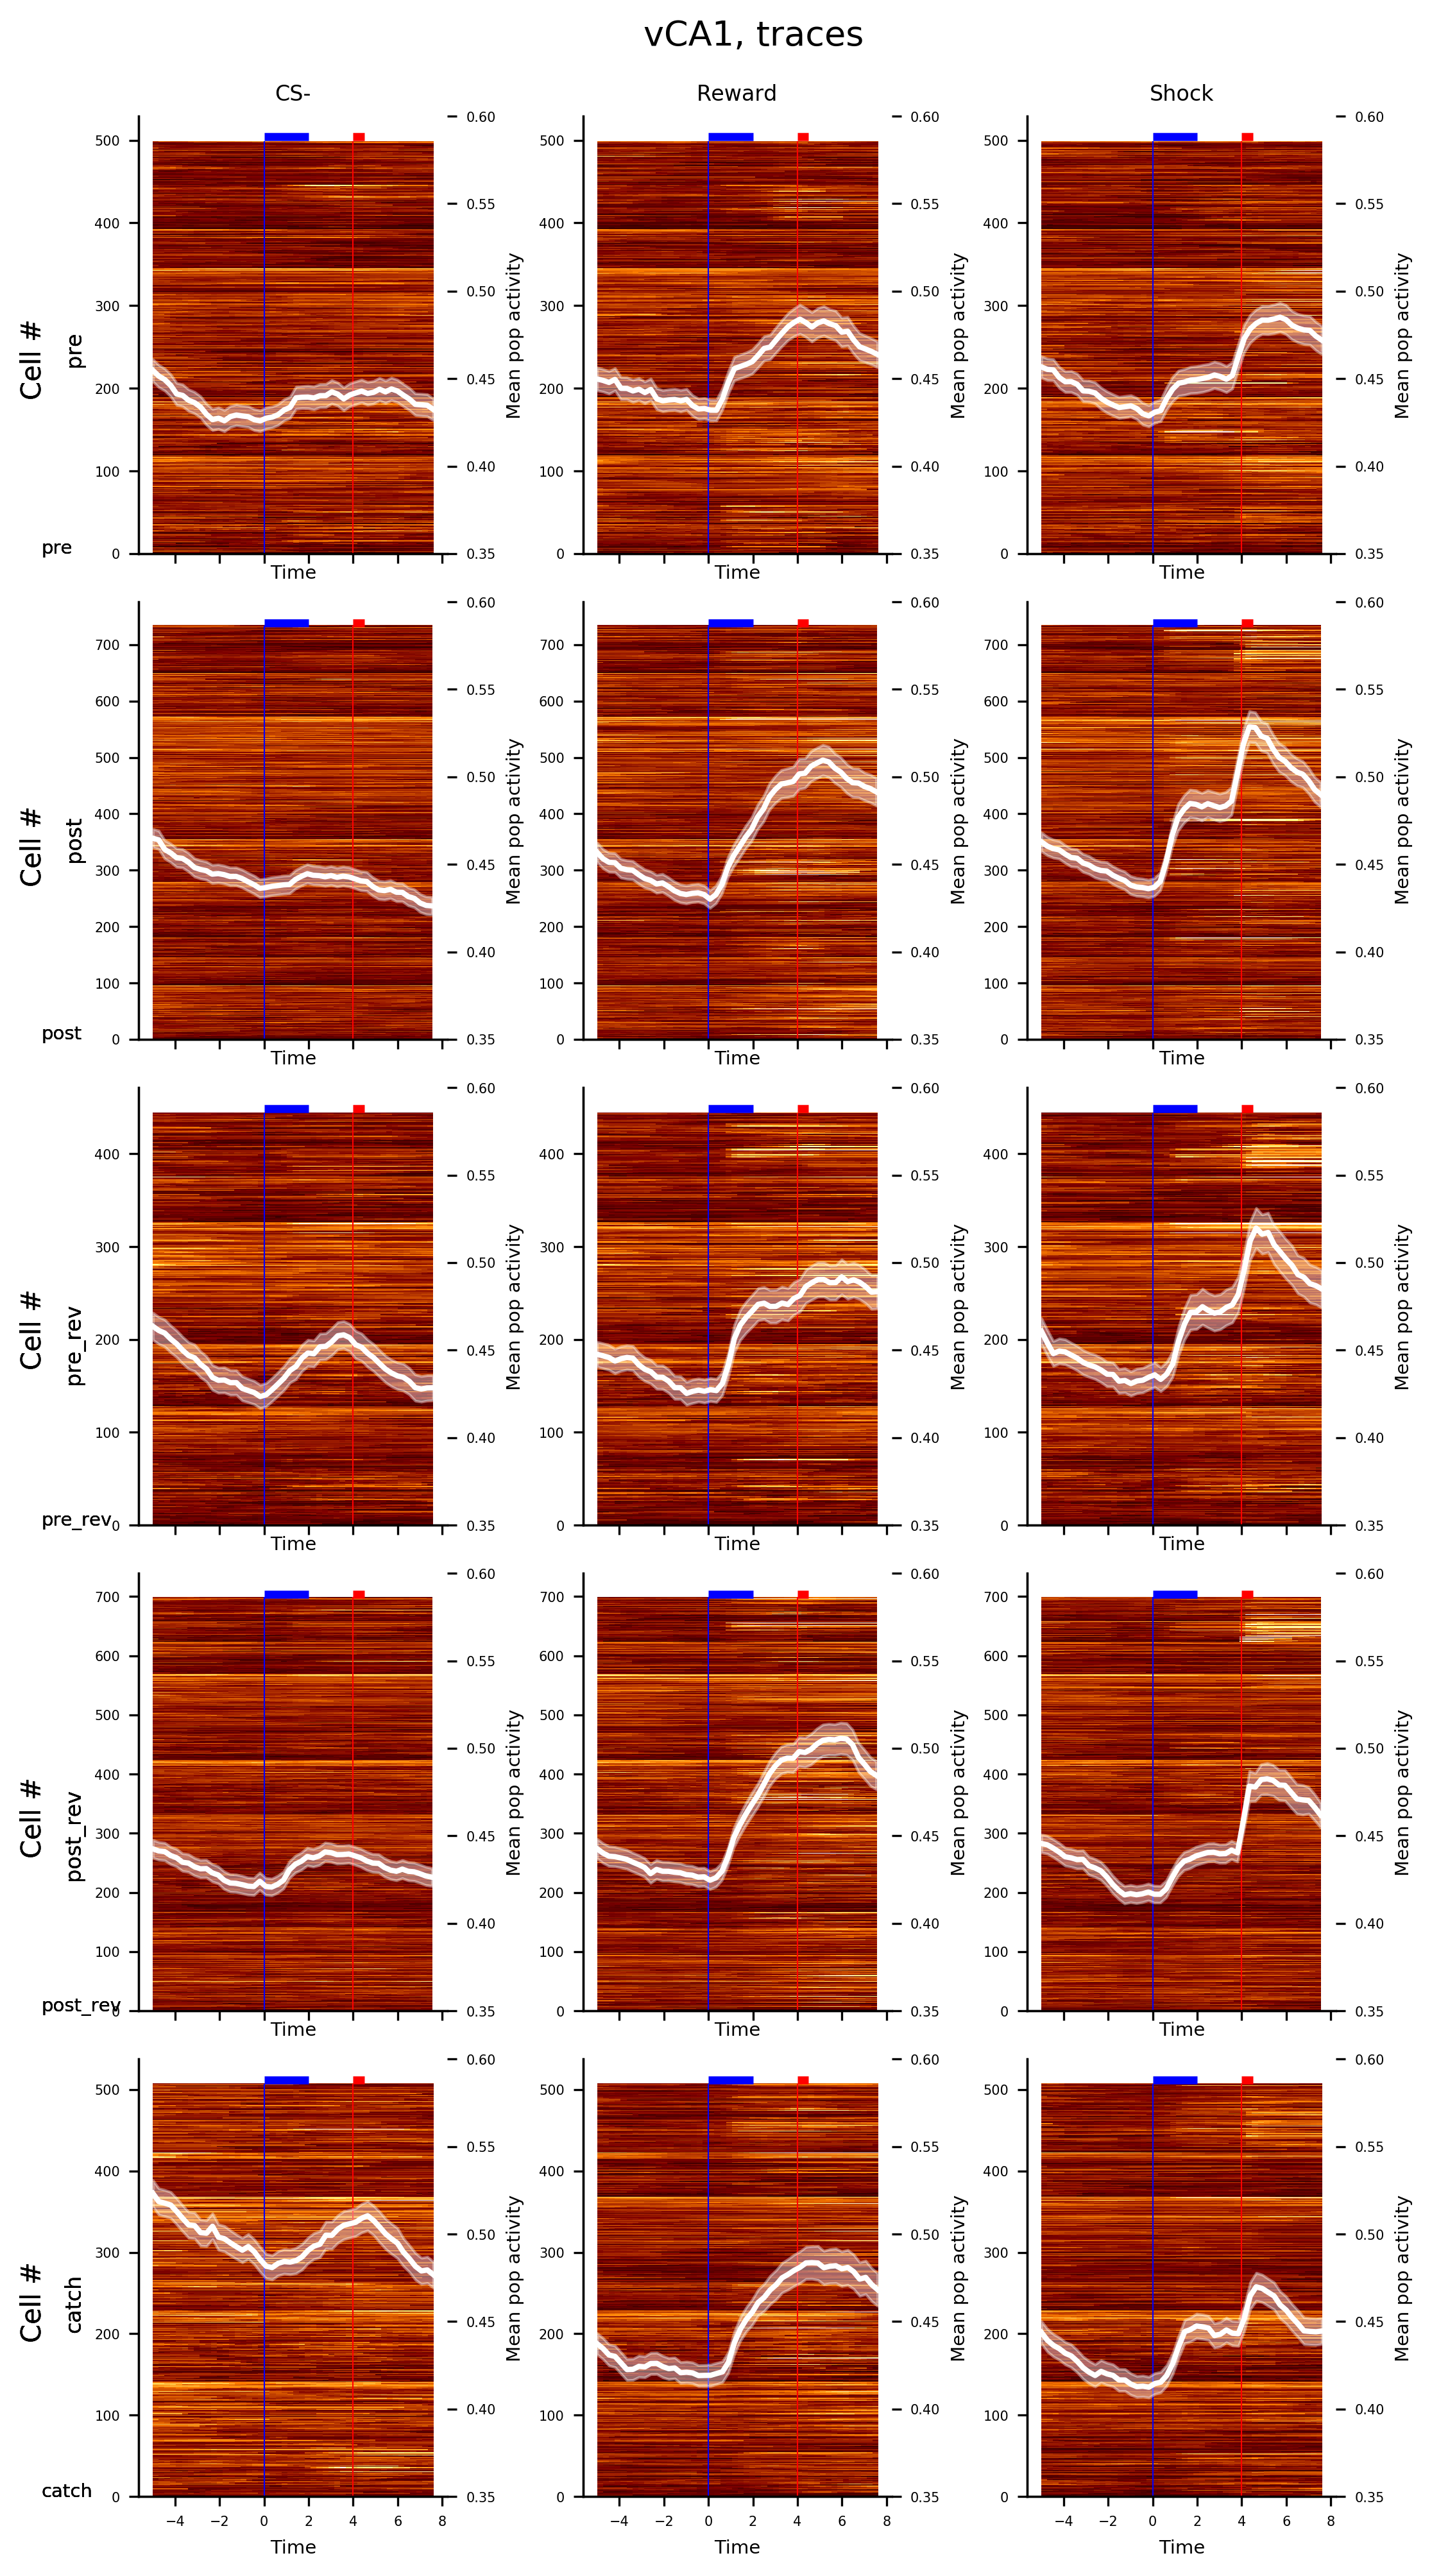

In [21]:
fig, axs = pl.subplots(len(sessions), 3, figsize=(7, np.ceil(all_hms_pre_CSm_traces.shape[0]/40.)), sharex=True)
for sess,i in zip(sessions,range(len(sessions))):
    for tt,z in zip(['CSm','Rew','Sh'],range(3)):
        func = lambda x, y: x.imshow(y, aspect='auto', extent=(eval("min_time_ax_single_%s[0]"%sess), eval("min_time_ax_single_%s[-1]"%sess), 0, 
                                 len(eval("all_hms_%s_%s_traces"%(sess,tt)))),vmin=0, vmax=1.5, cmap='afmhot')

        func(axs[i][z], eval("all_hms_%s_%s_traces"%(sess,tt)))
        axs[i][0].text(-10,0, sess, fontsize=7)
        axs[i][z].set_xlabel("Time")
        axs[i][z].vlines([0, 4], 0, len(eval("all_hms_%s_CSm_traces"%sess)), color=['b','r'], lw=.5)
        axs[i][z].hlines(len(eval("all_hms_%s_CSm_traces"%sess))+5, 0, 2, color='b', lw=3)
        axs[i][z].hlines(len(eval("all_hms_%s_CSm_traces"%sess))+5, 4, 4.5, color='r', lw=3)
        axs[i][0].text(-9,len(eval("all_hms_%s_CSm_traces"%sess))/2, sess, fontsize=8, rotation=90)
        axs[i][0].text(-11,len(eval("all_hms_%s_CSm_traces"%sess))/2+10, "Cell #", fontsize=10, rotation=90)
        twin_ax = axs[i][z].twinx()
        twin_ax.set_ylabel("Mean pop activity")
        twin_ax.plot(eval("min_time_ax_single_%s"%sess),eval("all_hms_%s_%s_traces.mean(0)"%(sess,tt)),color='w',lw=2)
        m = eval("all_hms_%s_%s_traces.mean(0)"%(sess,tt))
        sem = eval("all_hms_%s_%s_traces.std(0)/(math.sqrt(len(all_hms_%s_%s_traces)))"%(sess,tt,sess,tt))
        twin_ax.fill_between(eval("min_time_ax_single_%s"%sess),m-sem,m+sem,alpha=0.4,color='w',linewidth=1)
        twin_ax.set_ylim(0.35,.6)

# axs[0][0].imshow(all_hms_pre1[sort_pre1], aspect='auto', extent=(time_ax_single[0], time_ax_single[-1], 0, len(sort_pre1)),
#                  vmin=0, vmax=1)
#for ax in axs.flatten():
#    #pt.remove_axes(ax)
#    ax.tick_params(
#    axis='x',          # changes apply to the x-axis
#    which='both',      # both major and minor ticks are affected
#    bottom=False,      # ticks along the bottom edge are off
#    top=False,         # ticks along the top edge are off
#    labelbottom=False) # labels along the bottom edge are off
    #ax.vlines([0, 4], 0, len(sort_pre_CSm), color='b', lw=.5)

axs[0][0].set_title('CS-', fontsize=8)
axs[0][1].set_title('Reward', fontsize=8)
axs[0][2].set_title('Shock', fontsize=8)

fig.suptitle("vCA1, traces", fontsize=13, y=1.02)
fig.tight_layout()
fig.savefig('../img/%s_traces_heatmaps.jpg'%(NOTEBOOK_NAME))

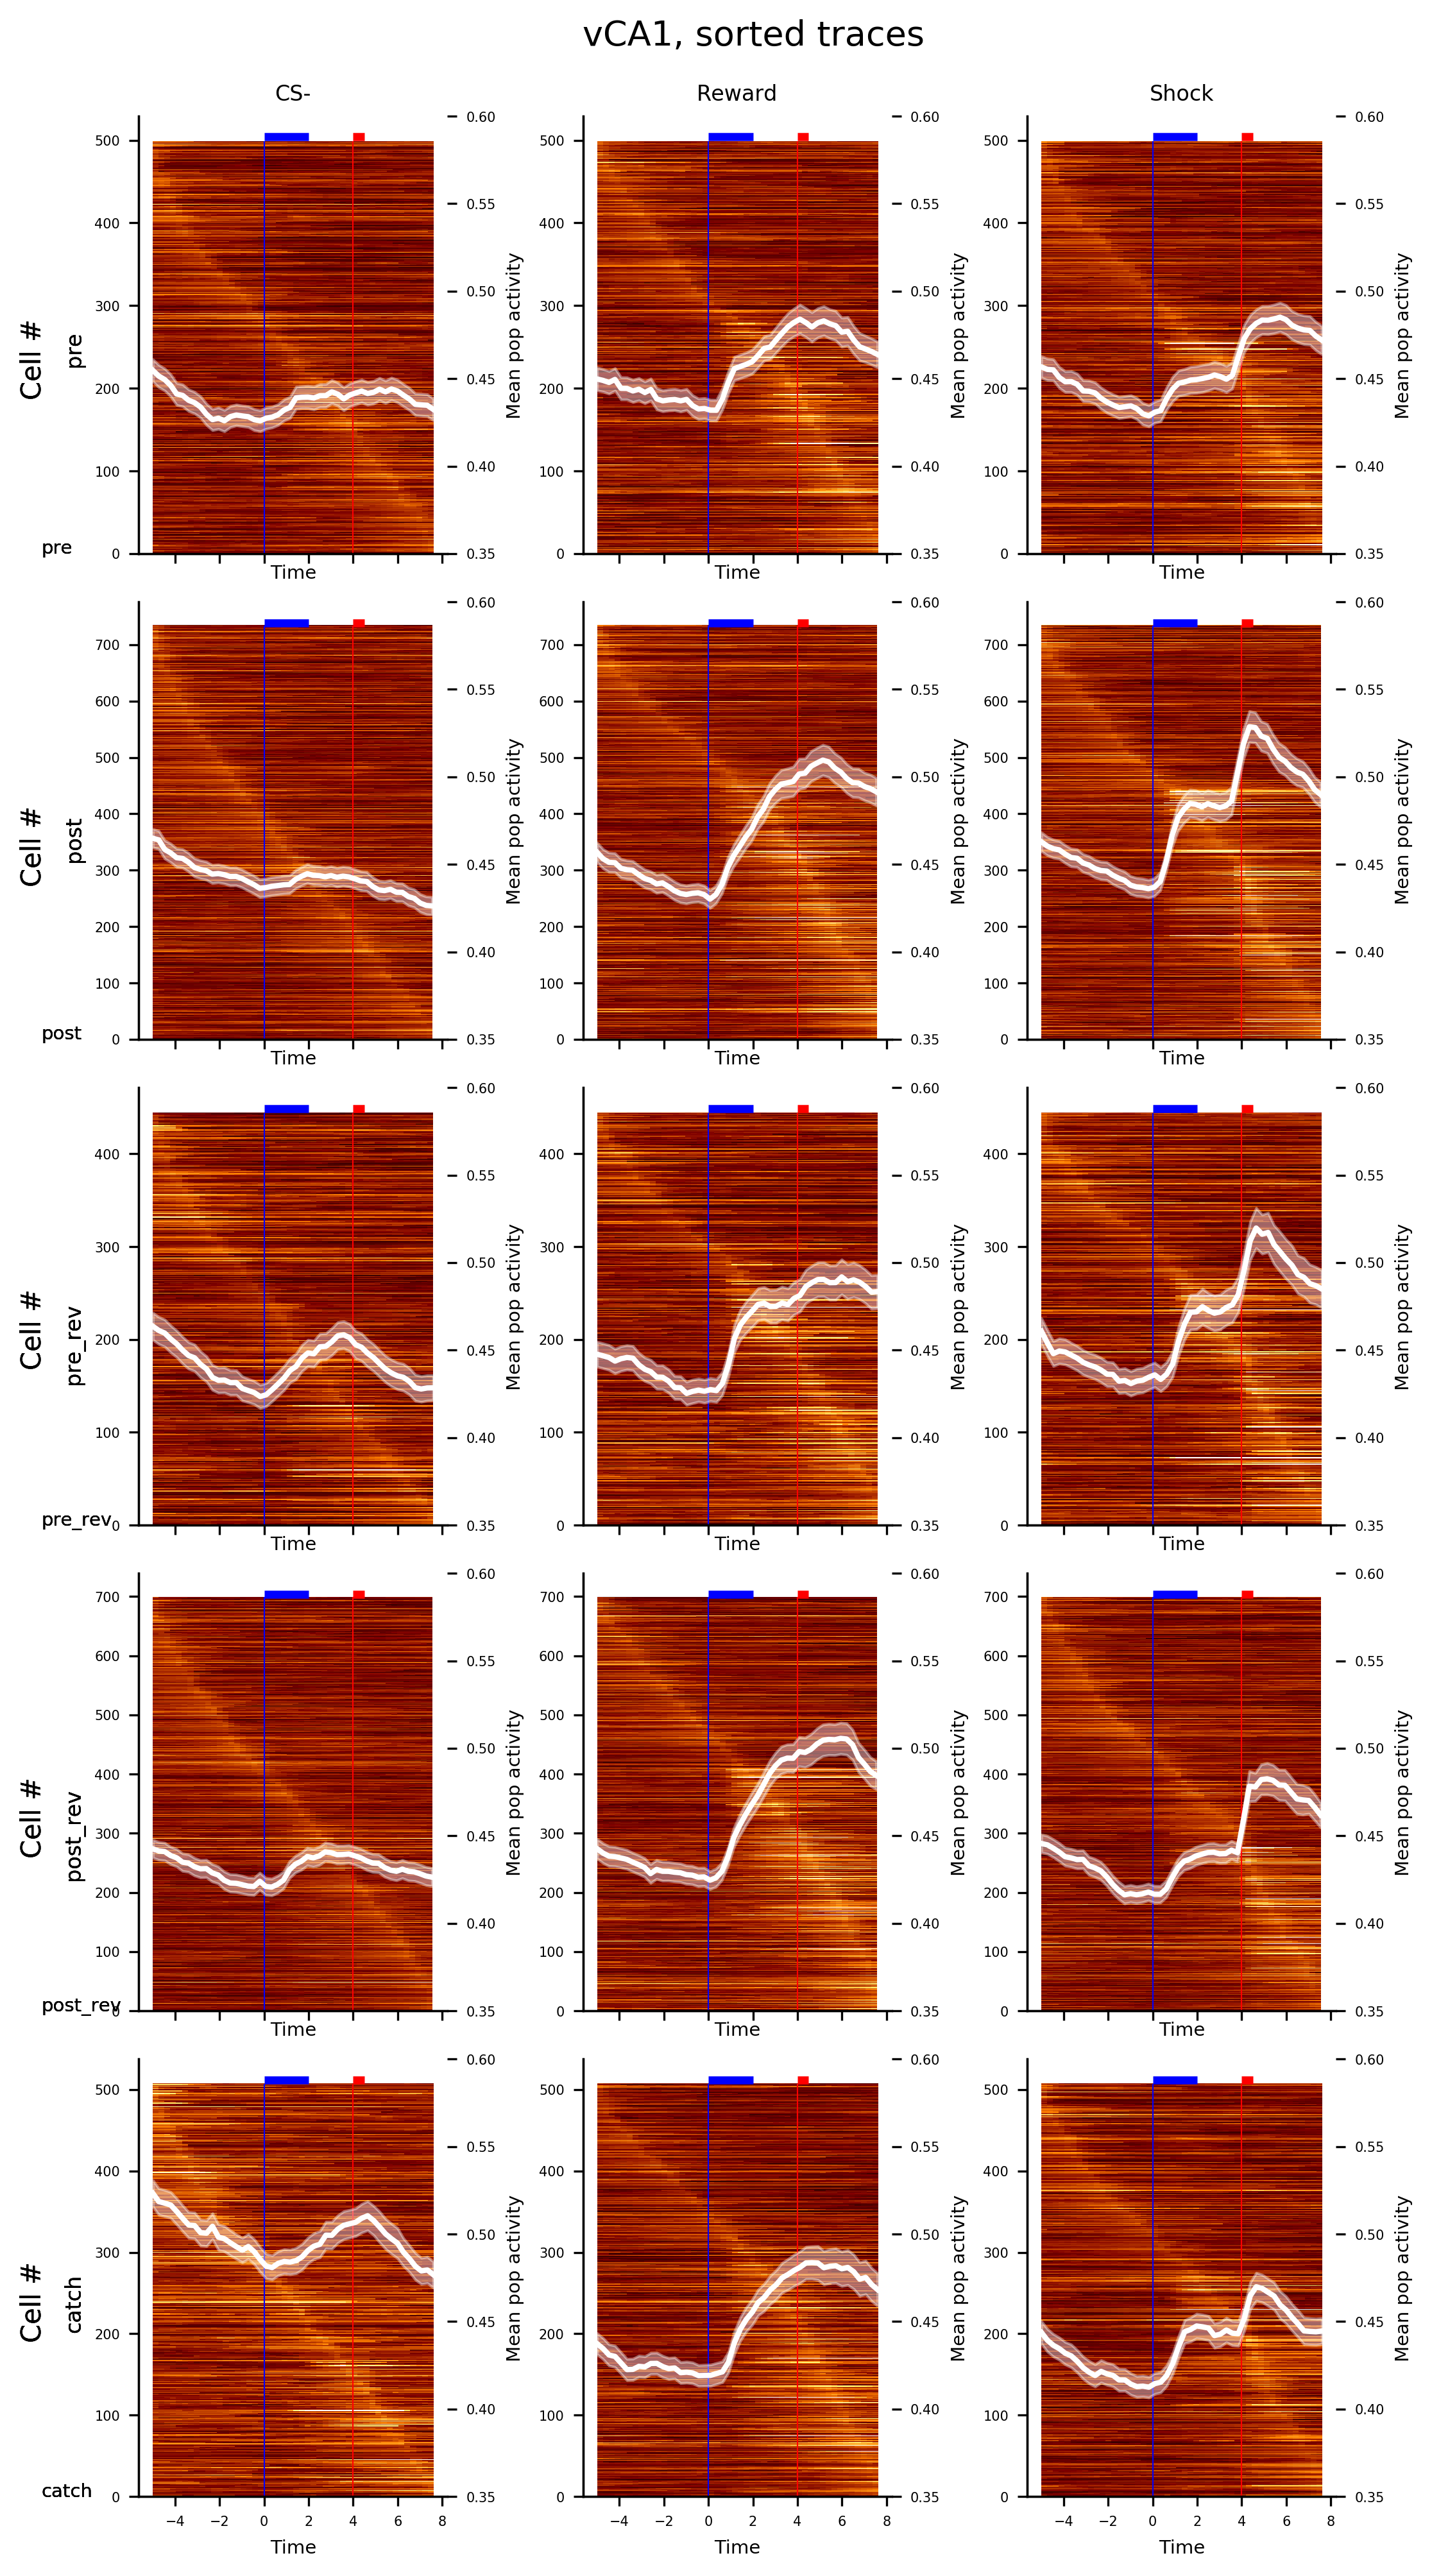

In [22]:
fig, axs = pl.subplots(len(sessions), 3, figsize=(7, np.ceil(all_hms_pre_CSm_traces.shape[0]/40.)), sharex=True)
for sess,i in zip(sessions,range(len(sessions))):
    for tt,z in zip(['CSm','Rew','Sh'],range(3)):
        func = lambda x, y: x.imshow(y, aspect='auto', extent=(eval("min_time_ax_single_%s[0]"%sess), eval("min_time_ax_single_%s[-1]"%sess), 0, 
                                 len(eval("all_hms_%s_%s_traces"%(sess,tt)))),vmin=0, vmax=1.5, cmap='afmhot')

        func(axs[i][z], eval("all_hms_%s_%s_traces[sort_%s_%s_traces]"%(sess,tt,sess,tt)))
        axs[i][0].text(-10,0, sess, fontsize=7)
        axs[i][z].set_xlabel("Time")
        axs[i][z].vlines([0, 4], 0, len(eval("all_hms_%s_CSm_traces"%sess)), color=['b','r'], lw=.5)
        axs[i][z].hlines(len(eval("all_hms_%s_CSm_traces"%sess))+5, 0, 2, color='b', lw=3)
        axs[i][z].hlines(len(eval("all_hms_%s_CSm_traces"%sess))+5, 4, 4.5, color='r', lw=3)
        axs[i][0].text(-9,len(eval("all_hms_%s_CSm_traces"%sess))/2, sess, fontsize=8, rotation=90)
        axs[i][0].text(-11,len(eval("all_hms_%s_CSm_traces"%sess))/2+10, "Cell #", fontsize=10, rotation=90)
        twin_ax = axs[i][z].twinx()
        twin_ax.set_ylabel("Mean pop activity")
        twin_ax.plot(eval("min_time_ax_single_%s"%sess),eval("all_hms_%s_%s_traces.mean(0)"%(sess,tt)),color='w',lw=2)
        m = eval("all_hms_%s_%s_traces.mean(0)"%(sess,tt))
        sem = eval("all_hms_%s_%s_traces.std(0)/(math.sqrt(len(all_hms_%s_%s_traces)))"%(sess,tt,sess,tt))
        twin_ax.fill_between(eval("min_time_ax_single_%s"%sess),m-sem,m+sem,alpha=0.4,color='w',linewidth=1)
        twin_ax.set_ylim(0.35,.6)

# axs[0][0].imshow(all_hms_pre1[sort_pre1], aspect='auto', extent=(time_ax_single[0], time_ax_single[-1], 0, len(sort_pre1)),
#                  vmin=0, vmax=1)
#for ax in axs.flatten():
#    #pt.remove_axes(ax)
#    ax.tick_params(
#    axis='x',          # changes apply to the x-axis
#    which='both',      # both major and minor ticks are affected
#    bottom=False,      # ticks along the bottom edge are off
#    top=False,         # ticks along the top edge are off
#    labelbottom=False) # labels along the bottom edge are off
    #ax.vlines([0, 4], 0, len(sort_pre_CSm), color='b', lw=.5)

axs[0][0].set_title('CS-', fontsize=8)
axs[0][1].set_title('Reward', fontsize=8)
axs[0][2].set_title('Shock', fontsize=8)

fig.suptitle("vCA1, sorted traces", fontsize=13, y=1.02)
fig.tight_layout()
fig.savefig('../img/%s_sorted_traces_heatmaps.jpg'%(NOTEBOOK_NAME))

In [23]:
##this means nothing w/o cellReg cells
#from scipy import stats as sstats
#
#corrs_CSm = np.r_[[sstats.pearsonr(a1[:min(len(a1), len(a2))], a2[:min(len(a1), len(a2))])[0]
#                 for a1, a2 in zip(all_hms_pre_CSm[sort_pre_CSm], all_hms_post_CSm[sort_pre_CSm])]]
#corrs_Rew = np.r_[[sstats.pearsonr(a1[:min(len(a1), len(a2))], a2[:min(len(a1), len(a2))])[0]
#                 for a1, a2 in zip(all_hms_pre_Rew[sort_pre_Rew], all_hms_post_Rew[sort_pre_Rew])]]
#corrs_Sh = np.r_[[sstats.pearsonr(a1[:min(len(a1), len(a2))], a2[:min(len(a1), len(a2))])[0]
#                 for a1, a2 in zip(all_hms_pre_Sh[sort_pre_Sh], all_hms_post_Sh[sort_pre_Sh])]]
#
#fig, ax = pl.subplots(1, 1, figsize=(2, 1))
#pt.plot_bars([corrs_CSm, corrs_Rew, corrs_Sh], stderr=True, ax=ax)
#pt.add_significance(ax, corrs_CSm, corrs_Rew, 0, 1, 0.2, sig_func=lambda x, y: sstats.kendalltau(x, y))
#pt.nicer_plot(ax)
#ax.set_xticks(range(3))
#ax.set_xticklabels(['CS-', 'Rew', 'Shock'])
#ax.set_ylabel('Tuning correlation\nPRE vs POST')

In [24]:
save_workspace(db)

Could not store variable 'di'. Skipping...
Could not store variable 'math'. Skipping...
Could not store variable 'os'. Skipping...
Could not store variable 'IPython'. Skipping...
Could not store variable 'pt'. Skipping...
Could not store variable 'sstats'. Skipping...
Could not store variable 'pl'. Skipping...
Could not store variable 'fig'. Skipping...
Could not store variable 'func'. Skipping...
Could not store variable 'ut'. Skipping...
Could not store variable 'pickle'. Skipping...
Could not store variable 'ip'. Skipping...
Could not store variable 'twin_ax'. Skipping...
Could not store variable 'np'. Skipping...
Could not store variable 'sys'. Skipping...
Could not store variable 'axs'. Skipping...
